# 自然语言处理第一周项目文档—内容相似度分析

## 1.项目内容：
本次项目提供一系列的英文句子对，每个句子对的两个句子，在语义上具有一定的相似性；每个句子对，获得一个在0-5之间的分值来衡量两个句子的语义相似性，打分越高说明两者的语义越相近。

项目提供数据为txt文件，字段之间以tab分割。

训练数据文件，共有1500个数据样本，共有4个字段；第一个字段为样本编号，第二个字段为一个句子，第三个字段为另一个句子，第四个字段为两个句子的语义相似度打分，如下：

10001	two big brown dogs running through the snow.	A brown dog running through the grass.	2.00000 

10002	A woman is peeling a potato.	A woman is slicing a tomato.	1.33300

测试数据文件，共有750个数据样本，共有3个字段；第一个字段为样本编号，第二个字段为一个句子，第三个字段为另一个句子，
举训练样例说明如下：

10001	two big brown dogs running through the snow.	 A brown dog running through the grass.

10002	A woman is peeling a potato.	 A woman is slicing a tomato.

## 2.基本思路：
我们的模型按照下图展示主要由三部分组成：
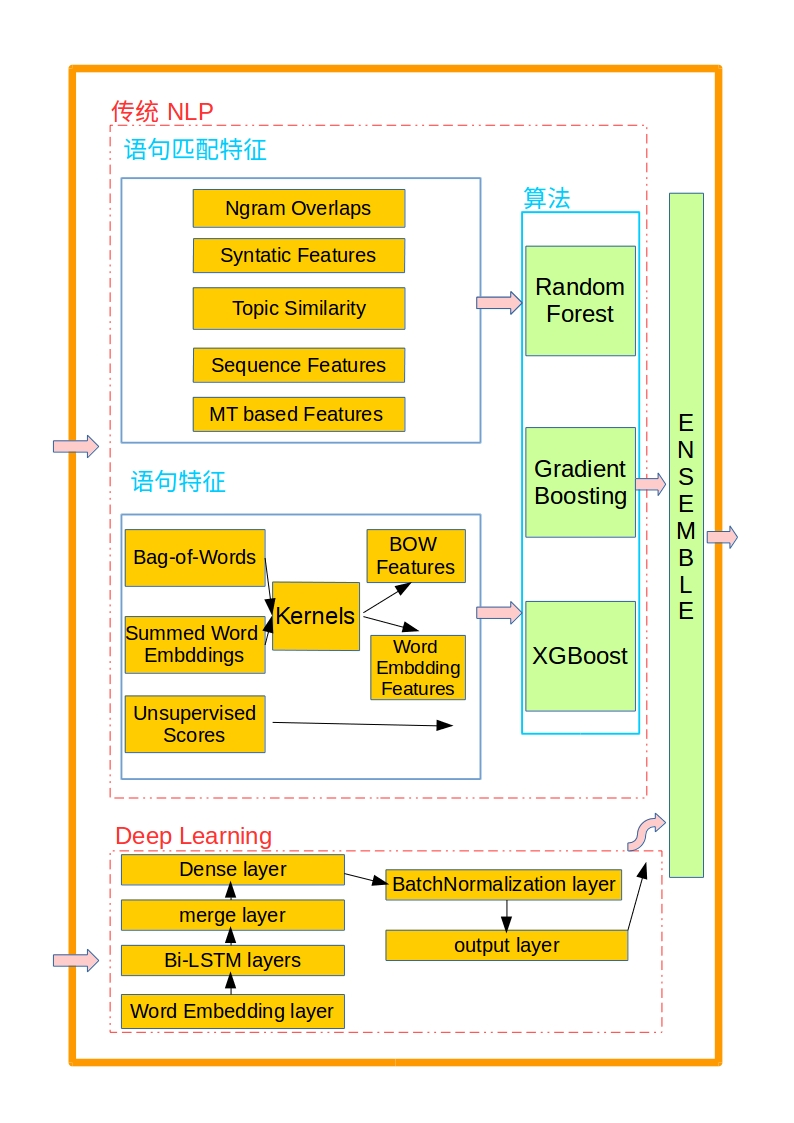
### 传统NLP模型：
    通过对每个sentence pair 分别提取匹配特征（即词之间的相关性）和 语句特征（即单个句子表征形式）来构建一个相似度计算模型。这些特征都将输入到最后的回归模型中，加以拟合得到我们的最终预测。
### 深度学习模型：
    通过将sentence pair表征为离散向量的形式，然后输入到end-to-end的网络中，我们计算出最后语句的相似度。

### Ensemble 模型：
    用来求前面模块的加权平均值来得到最后的score。
    
	下面我们将具体展示各个特征的意义。
    
## 2.1	传统NLP模型

### 2.1.1 匹配特征
    我们采用了五种sentence pair 匹配特征来直接计算两个句子之间的相似度。
#### N-gram Overlap：
    我们用Si来表示n-grams提取语句后后的集合，它的值通过下式定义：
$$ngo(S_{1},S_{2}) = 2*(\frac{\left | S_{1} \right |}{\left | S_{1}\bigcap S_{2} \right |})^{-1}$$
在这里我们先对文本做了预处理，去除了stopwords，然后针对$n = \left \{ 1,2,3,4 \right \}$进行了gram提取,最后我们获得了4个features。

#### Sequence Features(序列特征)
     序列特征是另一种捕捉语句内部信息的方法，它通过计算词性标注后语句的最大公共子字符串的长度来计算语句间的相似度。我们先求取两个语句的POS tags，然后再用公共子字符串的长度除以两个句子的总tags长度。最后我们得到了2个features。
#### Topic Features
        为了衡量语句间的相似性，我们采用了Latent Dirichlet Allocation （LDA）模型。这里我们简单的设置了topic的数量为6，对训练数据和测试数据进行了转化，得到6个特征。

#### Syntatic Features
    除了直接从结构化的句子词性list中直接求解公共子字符，我们还采用了树形结构的词性分析，通过计算在树形结构下的最大subpath，我们获取了一1个特征，此处词性树形结构的获取采用的是nltk库中的tagger函数。

#### MT based Features
# 补充

最后我们收集了8个sentence pair的特征。每个提取方向都有很大的可扩展性，如n-grams中，对原始文本和处理后的文本卡一进行word level的特征提取，对于序列模型考虑longest common prefix/suffix等，对Syntatic Features 采用不同的tree kernels，对MT based Feature 采用GTM-3，NIST Ol等计算方式。由于时间和经验的双双不足，我们只采用了很少的特征～

### 2.1.2 语句特征
这里我们通过直接向量化每个句子，然后再通过向量之间的计算来获得句子之间的相似度分析。

#### BOW Features
我们将每句话都用Bag-of-Word方式转成向量，并用tf-idf进行加权处理。

#### Word Embedding Features

# 补充
    
    
虽然这些特征能够很好地表征出语句的信息，尤其是对于语句间的相对关系方面，word2vec 一直是佼佼者。但是我们也可以发现两者的维数都达到了K级别，这是我们所不能接受的，毕竟前面的提取一共才8个！这不公平！所以我们通过采用核函数（kernel function）来对句中所有的词向量（姑且这么叫）做一个整合，将它们从高维向低维转化。
最后我们cosine distance、word mover distance、IDF加权和调和平均等方法，得到了3个特征。

#### Unsupervied Score Features

# 补充

### 2.1.3 回归算法
    我们一共使用了四种回归模型来预测最后的score：SVR，Random Forests（RF），Gradient Boosting(GB) 和 XGBoost（XGB)。前面三种都是采用scikit-learn中实现，而XGB是采用xgboost中实现。通过一段时间的实验，由于SVR表现的效果不佳，最终被黯然离场。



## 2.2 深度学习模型
# 补充

## 2.3 Ensemble 模型
由于在最后的评估中，深度学习模型下的score表现较差，所有最后的ensemble中我们没有给它的socre赋权重，当前的结果都是基于传统NLP的score。



    




# 3 实验过程及相关结果
## 3.1数据集
数据全部来自于training中1500个样本，我们通过nltk包进行了分词、词性还原、去除stopwords后，对剩余样本进行简单的sting处理。如10001样本：

two big brown dogs running through the snow. A brown dog running through the grass

处理后为：

two big brown dog run snow 	brown dog run grass

所有的代码都将开源到github中：
送入模型前，我们使用了sklearn中的train_test_split函数将数据集划分成0.7：0.3的训练集和交叉验证集。然后采用sklearn中的mean_squared_error函数和scipy 中的pearsonr函数作为我们验证的标准。（本次比赛的测试的得分，个人猜测就是pearsonr得分）

## 3.2特征表现
下面我们首先对特征集中每一个维度的特征进行单独打分，验证出单个特征对于模型分类的贡献程度，评分标准为 均方差和pearsonr系数：


## 3.3算法表现
同样，我们比较了各大算法的表现，结果如下


此处的结果中，各大算法用的是默认参数，并未进行特意的调参。
## 3.4成绩
虽然在此处Random Forest表现出了最为优异的性能，但是在最后实际的test数据中，Random Forest最佳的表现只有0.83左右，Ensemble还是以0.01多的优势达到了总体最优0.85，并且顺利地帮助我们达到了第五名的成绩。助教老哥们厉害的不行！


# 4 总结
这一周的学习中可以说是几经波折，最后看来结果还行。但是时间的分配不尽合理，花了近3天多的时间都在看论文，试图理解论文后去还原结果。导致后来coding和调参时间不足。对于特征的把握也不够全面，前前后后增加了三次特征。